Simulation Scenario #1 (Index 2 in the simulation_scenario document)

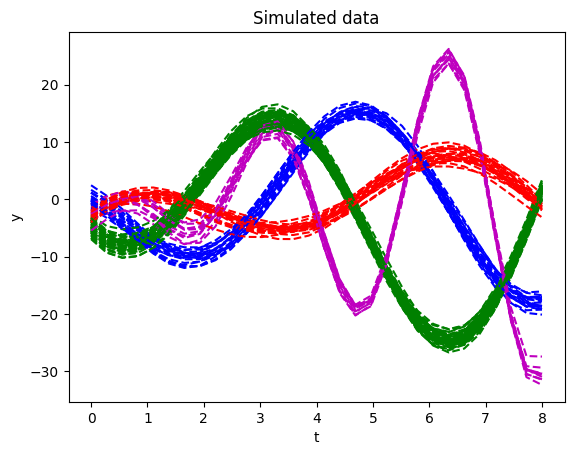

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import spatial, interpolate
from ensemble_clustering import functional_data_decomposition, functional_data_clustering
from fda_results import percentage_variation_ami_ari, plot_percentage_variation_ami_ari

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

# Sample from the Gaussian process distribution
nb_of_samples = 30  # Number of points in each function
# Independent variable samples
t = np.expand_dims(np.linspace(0, 8, nb_of_samples), 1)
Σ = exponentiated_quadratic(t, t)  # Kernel of data points

# Create different curves
mean_curve = np.zeros((4, len(t)))
mean_curve[0] = np.reshape(-8*np.sin(t)*np.log(t+2), (nb_of_samples))
mean_curve[1] = np.reshape(4*np.cos(t)*np.log(t+0.5), (nb_of_samples))
mean_curve[2] = np.reshape(-2-4*np.cos(t)*(np.sqrt(5*t+0.5)), (nb_of_samples))
mean_curve[3] = np.reshape(5*np.cos(2*t)*np.log(t+0.5)*(np.sqrt(t+0.5)), (nb_of_samples))

mixture_k = [0.2, 0.2, 0.5, 0.1]
n = 100
Y = np.zeros((n, len(t)))
simulation_label = np.zeros(n)

for i in range(n):
    # generate a random number between 0 and 1
    r = np.random.rand()
    # find the index of the mixture component
    if r < mixture_k[0]:
        # draw for the first component
        ys = np.random.multivariate_normal(
        mean=mean_curve[0], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='b')
        # Remember the label of the component
        simulation_label[i] = 0

    elif r < mixture_k[0] + mixture_k[1]:
        # draw for the second component
        # draw for the first component
        ys = np.random.multivariate_normal(
        mean=mean_curve[1], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='r')
        # Remember the label of the component
        simulation_label[i] = 1
    
    elif r < mixture_k[0] + mixture_k[1] + mixture_k[2]:
        # draw for the first component
        ys = np.random.multivariate_normal(
        mean=mean_curve[2], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='g')
        # Remember the label of the component
        simulation_label[i] = 2

    else:
        # draw for the first component
        ys = np.random.multivariate_normal(
        mean=mean_curve[3], cov=Σ, 
        size=1)
        Y[i] = ys
        plt.plot(t, ys[0], linestyle='--', color='m')
        # Remember the label of the component
        simulation_label[i] = 3

plt.title('Simulated data')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

FDA Element and KDE investigation

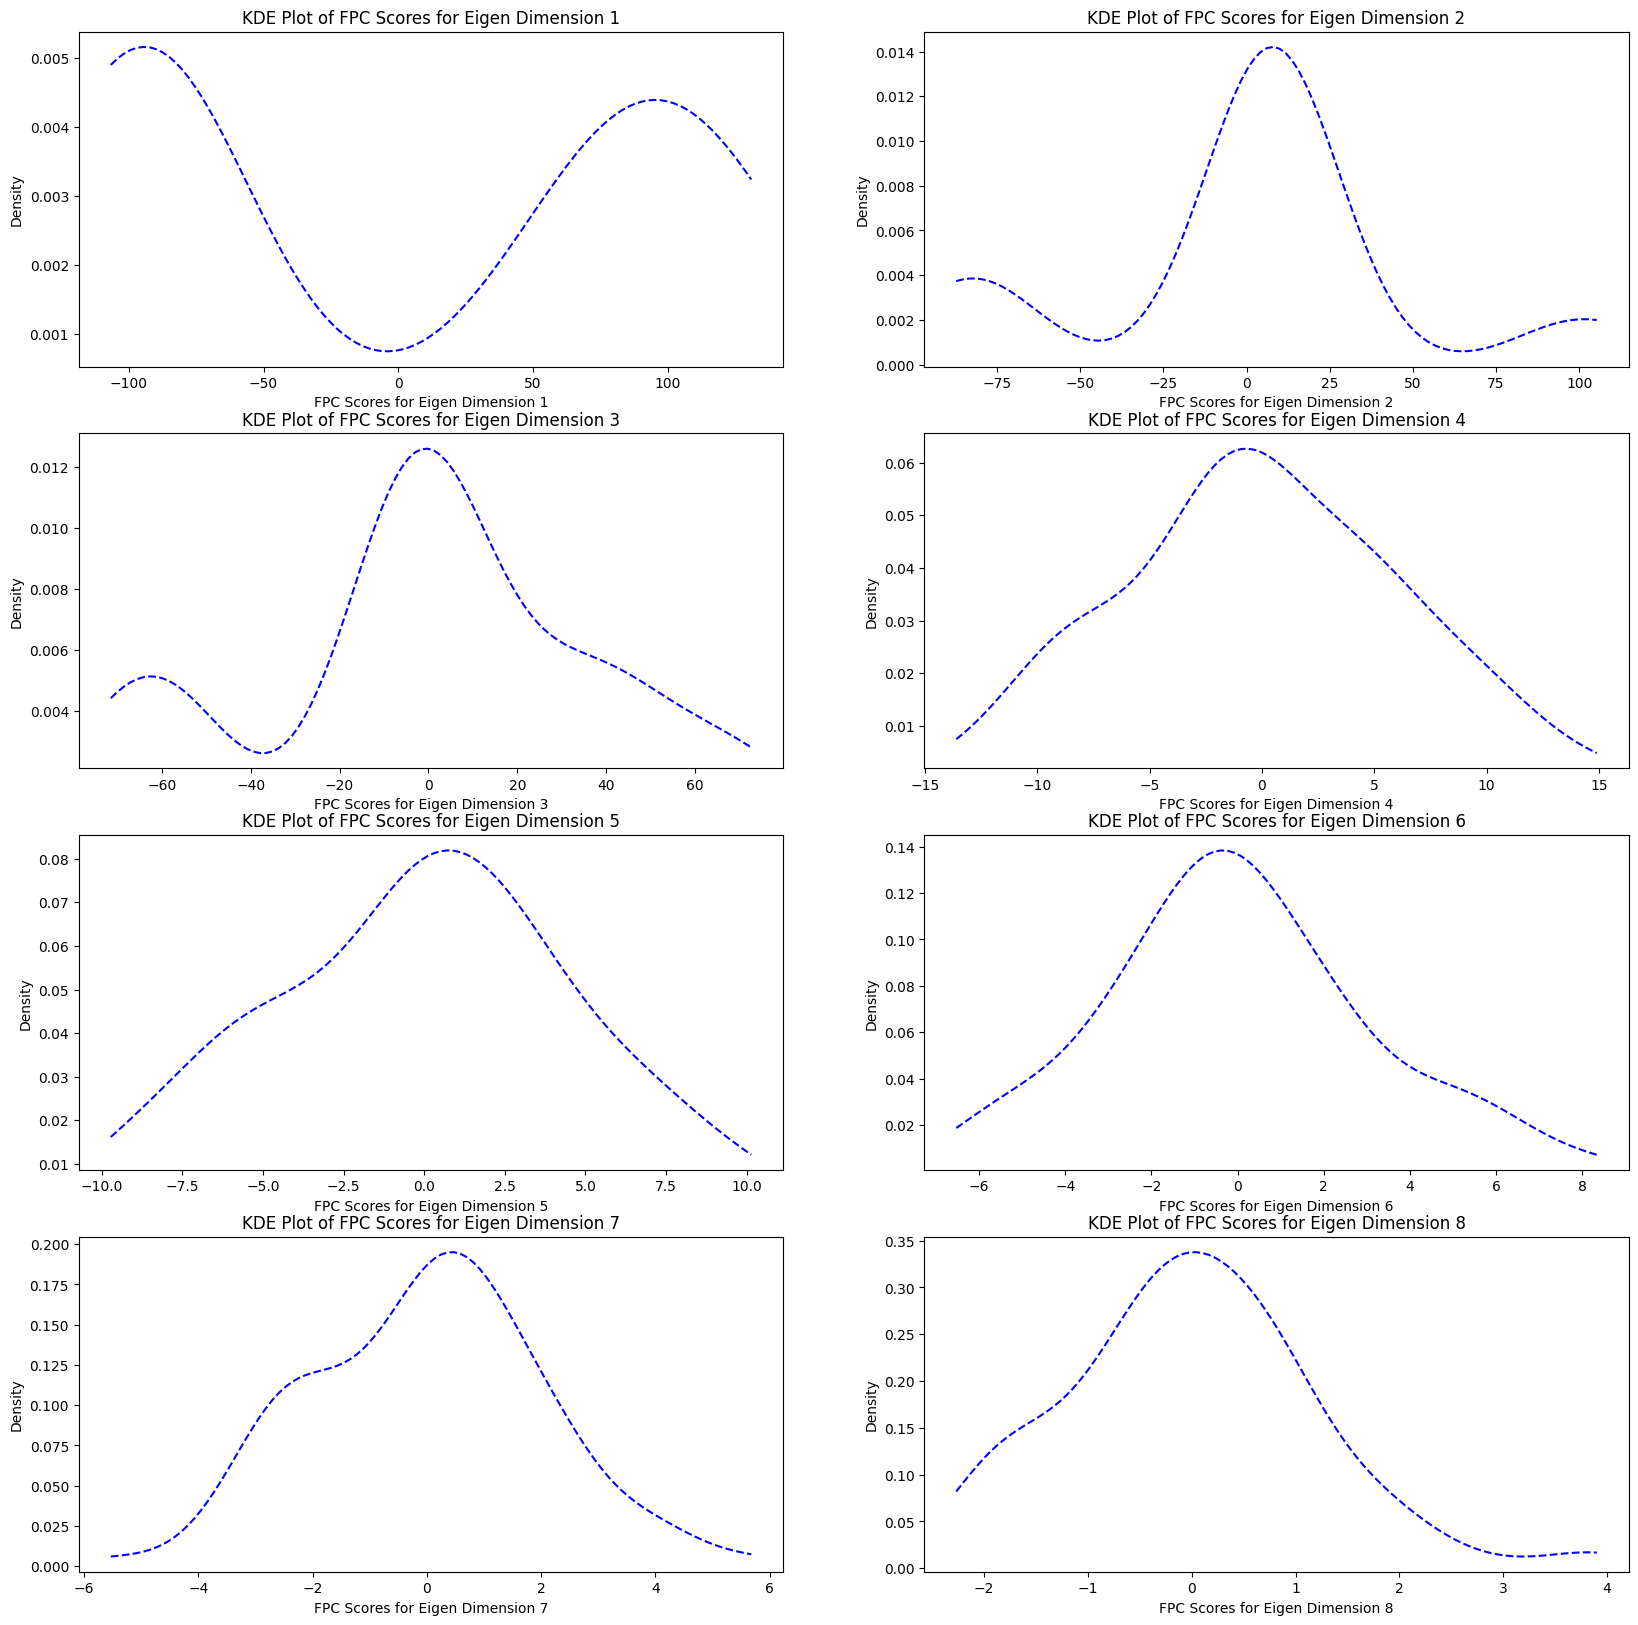

In [5]:
data_smooth, mean, principal_componenets, eigen_functions = functional_data_decomposition (Y, 10, 150)

# For loop to plot a 2x2 set of scatter plots for the kernel density plots of the first four principal components
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    # Kernel density plot for principal components[i], as a scatter plot
    # Determine the desnity of principal components[i]
    kde = scipy.stats.gaussian_kde(principal_componenets[:,i])
    # Create a grid of points
    x_grid = np.linspace(min(principal_componenets[:,i]), max(principal_componenets[:,i]), 100)
    # Evaluate the density on the grid
    density = kde(x_grid)
    # Plot the density
    ax[i//2, i%2].plot(x_grid, density, color='b', linestyle='--')
    ax[i//2, i%2].set_title('KDE Plot of FPC Scores for Eigen Dimension ' + str(i+1))
    ax[i//2, i%2].set_xlabel('FPC Scores for Eigen Dimension ' + str(i+1))
    ax[i//2, i%2].set_ylabel('Density')
plt.show()

Variance, Eigen Dimenstion and ARI/AMI Score Investigation

Percentage of variation explained by each eigen dimensions:  [6.41050947e-01 2.36742828e-01 1.16337813e-01 3.14991751e-03
 1.74566091e-03 5.98166349e-04 2.19639277e-04 1.10348860e-04
 3.39878512e-05 1.06913547e-05]


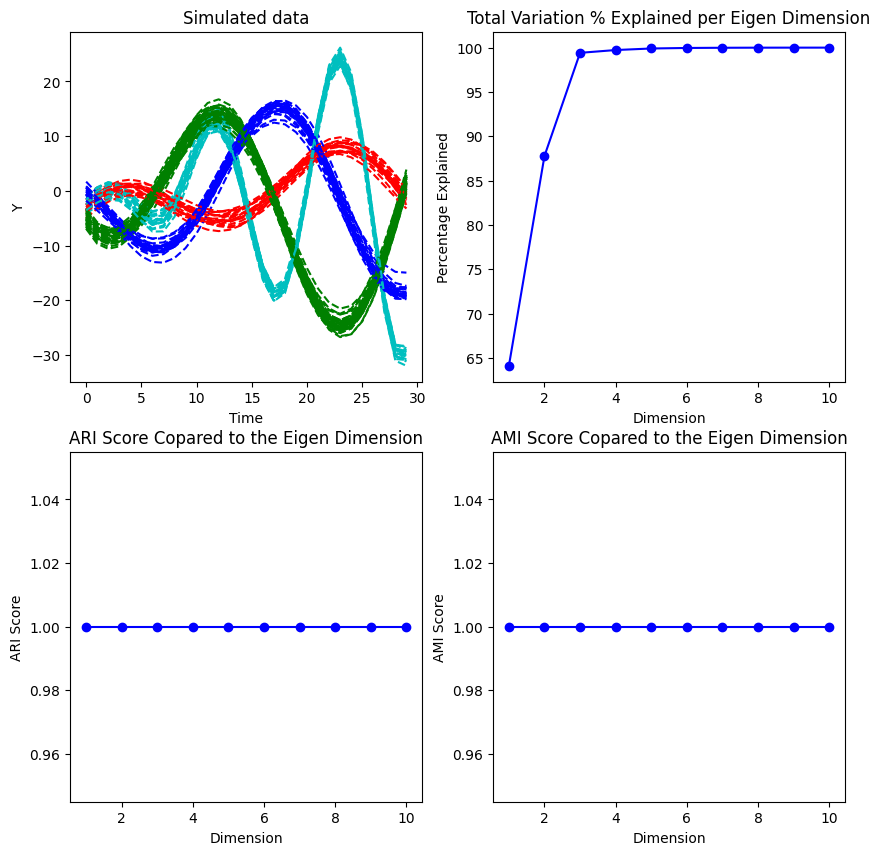

In [3]:
variance, ami, ari, v_range = percentage_variation_ami_ari(10, Y, 150, simulation_label, 4)
plot_percentage_variation_ami_ari(variance, ami, ari, v_range, simulation_label, Y)

Eigen Function and Variance Investigation

Percentage of variation explained by each eigen dimensions:  [6.41050947e-01 2.36742828e-01 1.16337813e-01 3.14991751e-03
 1.74566091e-03 5.98166349e-04 2.19639277e-04 1.10348860e-04
 3.39878512e-05 1.06913547e-05]


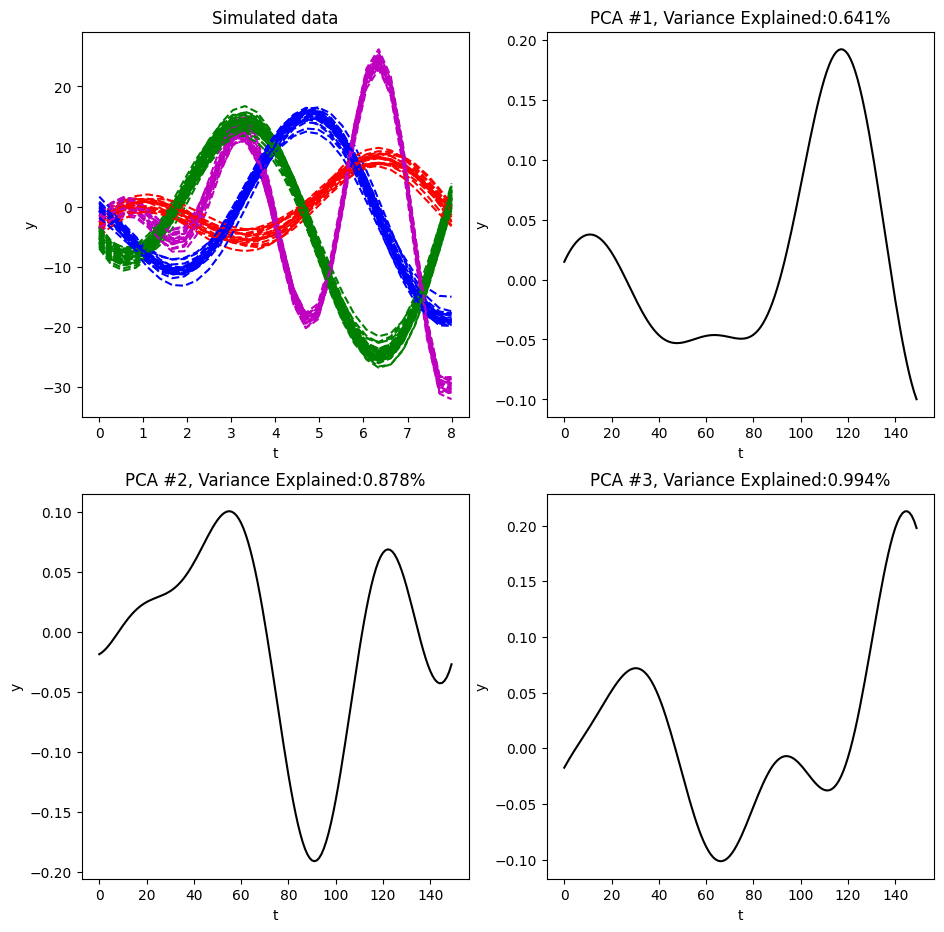

In [4]:
variance, ami, ari, v_range = percentage_variation_ami_ari(10, Y, 150, simulation_label, 4)

new_t = np.arange(0, 150, 1)

# Plot the data as the first 3 eigenfunctions of the data on four separate plots, in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(11, 11))
# Plot the simulated data
for i in range(len(Y)):
    if simulation_label[i] == 0:
        axs[0, 0].plot(t, Y[i], linestyle='--', color='b')
    elif simulation_label[i] == 1:
        axs[0, 0].plot(t, Y[i], linestyle='--', color='r')
    elif simulation_label[i] == 2:
        axs[0, 0].plot(t, Y[i], linestyle='--', color='g')
    else:
        axs[0, 0].plot(t, Y[i], linestyle='--', color='m')
axs[0, 0].set_title('Simulated data')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('y')
axs[0, 1].plot(new_t, eigen_functions[0], color='k')
axs[0, 1].set_title('PCA #1, Variance Explained:' + str(round(variance[0], 3)) + '%')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('y')
axs[1, 0].plot(new_t, eigen_functions[1], color='k')
axs[1, 0].set_title('PCA #2, Variance Explained:' + str(round(variance[0] + variance[1], 3)) + '%')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('y')
axs[1, 1].plot(new_t, eigen_functions[2], color='k')
axs[1, 1].set_title('PCA #3, Variance Explained:' + str(round(variance[0] + variance[1] + variance[2], 3)) + '%')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('y')
plt.show()

Decide the Eigen Dimension Based on the Total Variance

In [8]:
# Determine the Eigen Dimension that explains 95% of the variance
for i in range(len(variance)):
    if sum(variance[:i]) >= 0.95:
        print('The Eigen Dimension that explains 95% of the variance is ' + str(i))
        V = i -1
        if V == 0:
            V = 1
        break

The Eigen Dimension that explains 95% of the variance is 3


Finally, Applying Ensemble Clustering Method to the Data

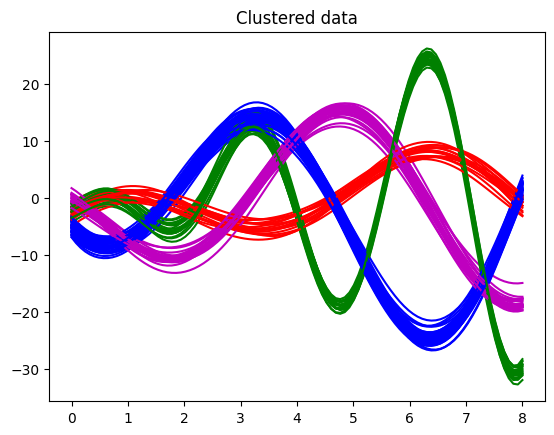

AMI score: 1.000000
ARI score: 1.000000


In [9]:
# Get data from the first function
data_smooth, mean, principal_componenets, eigen_functions = functional_data_decomposition (Y, V, 100)

# Get data from the second function
membership_matrices, labels = functional_data_clustering (principal_componenets, 4)

# Plot the curves with their labels
t = np.expand_dims(np.linspace(0, 8, len(data_smooth[0])), 1)
for i in range(len(data_smooth)):
    if labels[i] == 0:
        plt.plot(t, data_smooth[i], '-m')
    elif labels[i] == 1:
        plt.plot(t, data_smooth[i], '-g')
    elif labels[i] == 2:
        plt.plot(t, data_smooth[i], '-b')
    else:
        plt.plot(t, data_smooth[i], '-r')
plt.title('Clustered data')
plt.show()

from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

print("AMI score: %f" % adjusted_mutual_info_score(simulation_label, labels))
print("ARI score: %f" % adjusted_rand_score(simulation_label, labels))

Comparing it to FCUBT Method

In [23]:
from FDApy.clustering.fcubt import Node, FCUBT
from FDApy.representation.functional_data import DenseFunctionalData

# Make t a dict
t = np.expand_dims(np.linspace(0, 20, len(Y[0])), 1)
t = {'input_dim_0': t}
# Change t from (100, 1) to (100,)
t = {k: v.squeeze() for k, v in t.items()}

data = DenseFunctionalData(t, Y)
# Build the tree
root_node = Node(data, is_root=True)
fcubt = FCUBT(root_node=root_node)

# Growing
fcubt.grow(n_components=0.95, min_size=10)

# Joining
fcubt.join(n_components=0.95)

# Get the ARI
print("ARI score for FCUBT: %f" % adjusted_rand_score(simulation_label, fcubt.labels_join))
# Get the AMI
print("AMI score for FCUBT: %f" % adjusted_mutual_info_score(simulation_label, fcubt.labels_join))

ARI score for FCUBT: 0.856921
AMI score for FCUBT: 0.801397


Store the Data in separate Files for testing in R

In [11]:
# Store the data in DataStore.csv
np.savetxt('Data/DataStore.csv', Y, delimiter=',')
np.savetxt('Data/LabelStore.csv', simulation_label, delimiter=',')

FunHDDC Comparison Method

In [10]:
# To simulate funHDDC, run run the R file funHDDC.R

# Read Labels from PredictedLabels.csv, ignoring the header and the first column
predicted_labels = np.genfromtxt('Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=1)
print("ARI score for funHDDC: %f" % adjusted_rand_score(simulation_label, predicted_labels))
print("AMI score for funHDDC: %f" % adjusted_mutual_info_score(simulation_label, predicted_labels))

ARI score for funHDDC: 0.733115
AMI score for funHDDC: 0.753537


FunFEM Comparison Method

In [26]:
# To simulate funFEM, run run the R file funFEM.R

# Read labels from PredictedLabels.csv, ignoring the header and the first column and getting the first four columns
predicted_labels = np.genfromtxt('Data/PredictedLabelsStore.csv', delimiter=',', skip_header=1, usecols=range(1, 5))
#   Format the labels
labels = np.zeros(len(predicted_labels))
for i in range(len(predicted_labels)):
    labels[i] = np.argmax(predicted_labels[i])
print("ARI score for funFEM: %f" % adjusted_rand_score(simulation_label, labels))
print("AMI score for funFEM: %f" % adjusted_mutual_info_score(simulation_label, labels))


ARI score for funFEM: 0.940046
AMI score for funFEM: 0.903281
